# Multiple Linear Regression

This task consist a table of 50 start up company and a break down of spending and profit. Linear Regression is then used to find the correlation between them. The data table takes the following format:


R&D Spend | Administration | Marketing Spend | State | Profit
---:|:---: | :---: | :---: |---
165349.2 | 136897.8 |	471784.1	| New York	|192261.83

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
dataset = pd.read_csv('50_Startups.csv')
#x contains cost&location info and Y profit
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
print('Format of X',X[0], '\nFormat of Y',y[0])

Format of X [165349.2 136897.8 471784.1 'New York'] 
Format of Y 192261.83


## Encoding categorical data

In [15]:
#already explained in data_process 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#NOTE: fit_transform applies to training data, transform applies to test data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
print('Format of X with encoded city data:\n',X[0])

Format of X with encoded city data:
 [0.0 0.0 1.0 165349.2 136897.8 471784.1]


## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [22]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


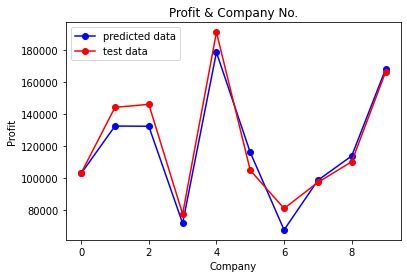

In [34]:
plt.plot(y_pred, marker='o', color = 'blue', label ='predicted data')
plt.plot(y_test, color = 'red', marker='o', label = 'test data')
plt.title('Profit & Company No.')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.legend(loc="upper left")
plt.show()